In [69]:
import pandas as pd
import matplotlib.pyplot as plt

Step 1:  Plot MPG (miles per gallon) vs. each of the other factors in the data set

Text(0, 0.5, 'Origin')

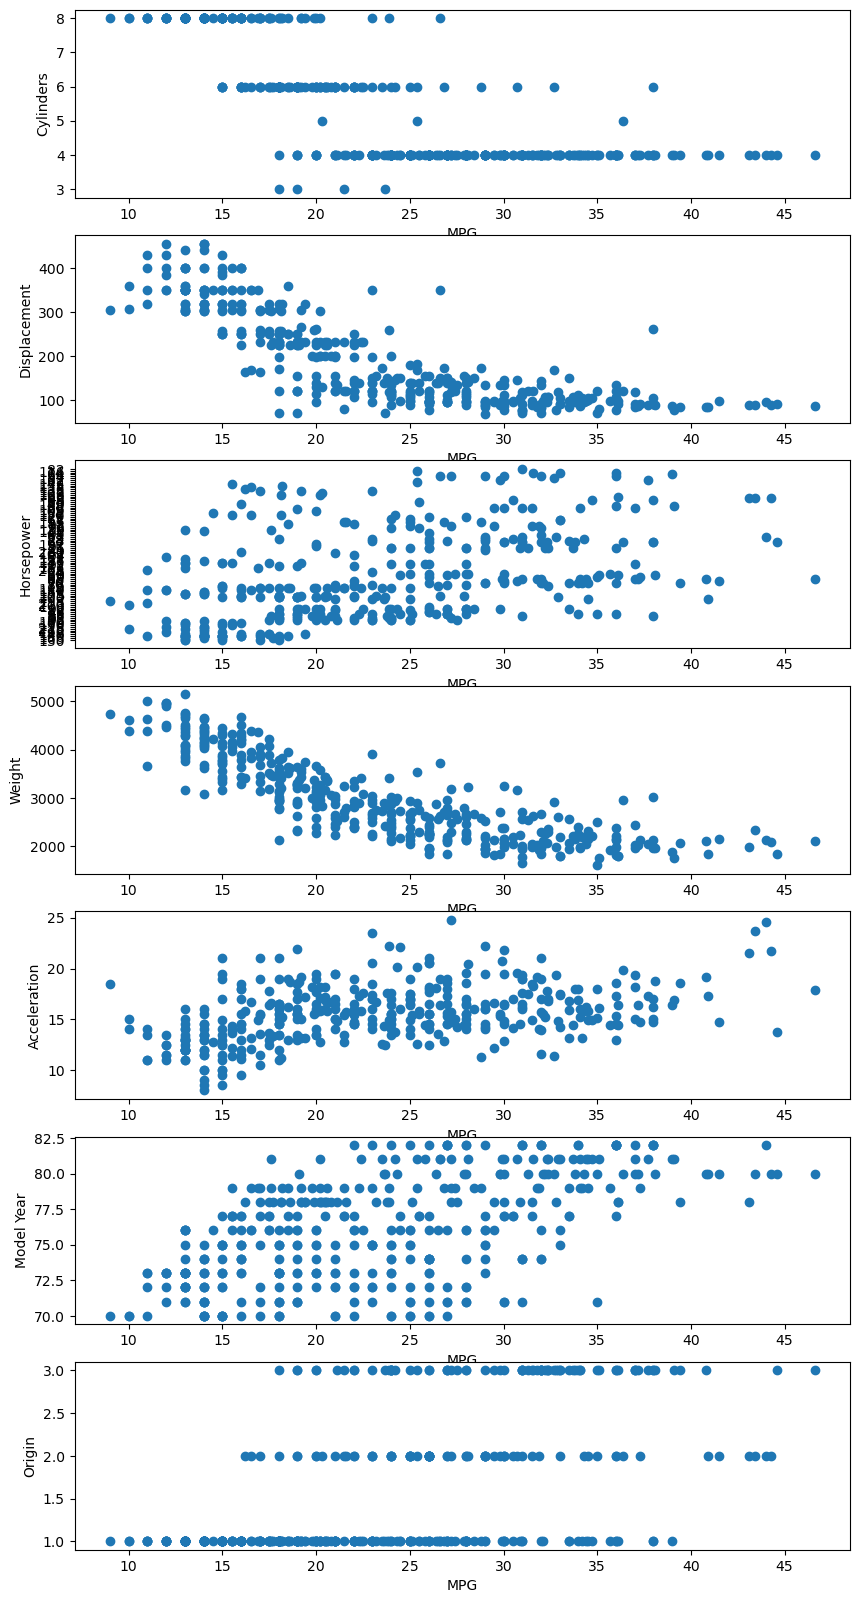

In [70]:
data = pd.read_csv("auto-mpg.csv")

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1, figsize=(10,20))

# Plot MPG vs. Cylinders
ax1.plot(data['mpg'], data['cylinders'], 'o')
ax1.set_xlabel("MPG")
ax1.set_ylabel("Cylinders")

# Plot MPG vs. Displacement
ax2.plot(data['mpg'], data['displacement'], 'o')
ax2.set_xlabel("MPG")
ax2.set_ylabel("Displacement")

# Plot MPG vs. Horsepower
ax3.plot(data['mpg'], data['horsepower'], 'o')
ax3.set_xlabel("MPG")
ax3.set_ylabel("Horsepower")

# Plot MPG vs. Weight
ax4.plot(data['mpg'], data['weight'], 'o')
ax4.set_xlabel("MPG")
ax4.set_ylabel("Weight")

# Plot MPG vs. Acceleration
ax5.plot(data['mpg'], data['acceleration'], 'o')
ax5.set_xlabel("MPG")
ax5.set_ylabel("Acceleration")

# Plot MPG vs. Model Year
ax6.plot(data['mpg'], data['model year'], 'o')
ax6.set_xlabel("MPG")
ax6.set_ylabel("Model Year")

# Plot MPG vs. Origin
ax7.plot(data['mpg'], data['origin'], 'o')
ax7.set_xlabel("MPG")
ax7.set_ylabel("Origin")


Step 2:  “Clean” the data.  There are two important aspects to this.  You will find that the ‘horsepower’ data is not a simple integer or floating point number.  In addition, there are some missing values for this column.  One way of dealing with this is to (a) convert the data to a numeric value and then (b) replace this missing values with the mean value of the remaining data:


In [71]:
# (a) convert the data to a numeric value
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors ='coerce')
    
# (b) replace this missing values with the mean value of the remaining data
mean_horsepower = data['horsepower'].mean()
data['horsepower'] = data['horsepower'].fillna(mean_horsepower)

Step 3:  Create NORMALIZED column data for each of the factors, as we did in the example presented in class.


In [72]:
# cylinders
data['Cylinders_Normalized'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()

# displacement
data['Displacement_Normalized'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()

# horsepower
data['Horsepower_Normalized'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()

# weight
data['Weight_Normalized'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()

# acceleration
data['Acceleration_Normalized'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()

# model year
data['Model_Year_Normalized'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()

# origin
data['Origin_Normalized'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()

Step 4:  Create and fit a linear regression model that just includes the terms linear in the factors (i.e. do not include any interation terms or higher order terms).  Once fit, create a column in the data frame for the predictions and residuals of this model.  As a measure of how well this model does, you might create a histogram of the residuals, and extract the standard deviation of the residuals.


In [73]:
import statsmodels.formula.api as smf
import numpy as np

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.25e-141
Time:                        21:15:51   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

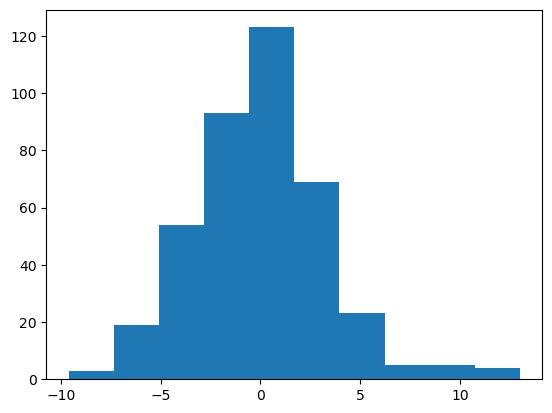

In [74]:
# From Height.ipynb

# Fit a linear regression model (y, X)
model = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized + Weight_Normalized + Acceleration_Normalized + Model_Year_Normalized + Origin_Normalized', data=data)
model = model.fit()

# View model summary
print(model.summary())

# Predict values
mpg_pred = model.predict()

# Add this prediction to the DataFrame
data['MPG_Predicted'] = mpg_pred
# Add the DIFFERENCE between MPG data and prediction to the DataFrame
data['MPG_Residual'] = data['mpg'] - mpg_pred
print(data.head())

plt.hist(data['MPG_Residual'])

# Get standard deviation of residuals
print('Standard deviation of residuals = ',np.std(data['MPG_Residual']))


Step 5:  Remove any terms in the model that are not statistically significant (P < 0.05) and refit with this new model.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.11e-93
Time:                        21:15:51   Log-Likelihood:                -1160.9
No. Observations:                 398   AIC:                             2332.
Df Residuals:                     393   BIC:                             2352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

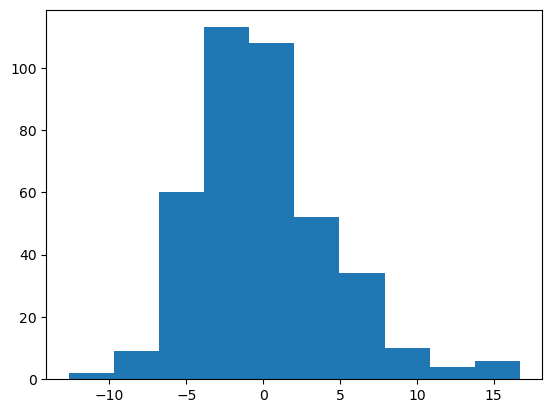

In [75]:
# Fit a linear regression model (y, X)
model2 = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized + Acceleration_Normalized', data=data)
model2 = model2.fit()

# View model summary
print(model2.summary())

# Predict values
mpg_pred_model2 = model2.predict()

# Add this prediction to the DataFrame
data['MPG_Predicted_Model2'] = mpg_pred_model2
# Add the DIFFERENCE between MPG data and prediction to the DataFrame
data['MPG_Residual_Model2'] = data['mpg'] - mpg_pred_model2
print(data.head())

plt.hist(data['MPG_Residual_Model2'])

# Get standard deviation of residuals
print('Standard deviation of residuals = ',np.std(data['MPG_Residual_Model2']))


Step 6:  Now, add in the interaction terms.  You should add back into the model all of the first order linear terms (even if they are not statistically significant in Step 5).  Note that if there are seven possible factors that might affect MPG, then there will be ( 6 + 5 + 4 + 3 + 2 + 1 = ) 21 additional interaction terms.  So, you should then have a model with 28 total terms!


In [76]:
# Fit a linear regression model (y, X)
model3 = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized + Weight_Normalized + Acceleration_Normalized + Model_Year_Normalized + Origin_Normalized + (Cylinders_Normalized * Displacement_Normalized) + (Cylinders_Normalized * Horsepower_Normalized) + (Cylinders_Normalized * Weight_Normalized) + (Cylinders_Normalized * Acceleration_Normalized) + (Cylinders_Normalized * Model_Year_Normalized) + (Cylinders_Normalized * Origin_Normalized) + (Displacement_Normalized * Horsepower_Normalized) + (Displacement_Normalized * Weight_Normalized) + (Displacement_Normalized * Acceleration_Normalized) + (Displacement_Normalized * Model_Year_Normalized) + (Displacement_Normalized * Origin_Normalized) + (Horsepower_Normalized * Weight_Normalized) + (Horsepower_Normalized * Acceleration_Normalized) + (Horsepower_Normalized * Model_Year_Normalized) + (Horsepower_Normalized * Origin_Normalized) + (Weight_Normalized * Acceleration_Normalized) + (Weight_Normalized * Model_Year_Normalized) + (Weight_Normalized * Origin_Normalized) + (Acceleration_Normalized * Model_Year_Normalized) + (Acceleration_Normalized * Origin_Normalized) + (Model_Year_Normalized * Origin_Normalized)', data=data)


Step 7:  Fit the data with this model, create predictions, residuals, histogram of residuals, and standard deviation of residuals.  Which interaction terms are significant?   Is this model better?


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.64e-157
Time:                        21:15:51   Log-Likelihood:                -945.50
No. Observations:                 398   AIC:                             1949.
Df Residuals:                     369   BIC:                             2065.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

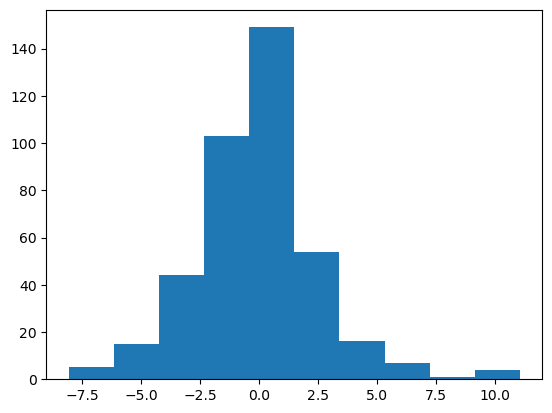

In [77]:
model3 = model3.fit()

# View model summary
print(model3.summary())

# Predict values
mpg_pred_model3 = model3.predict()

# Add this prediction to the DataFrame
data['MPG_Predicted_Model3'] = mpg_pred_model3
# Add the DIFFERENCE between MPG data and prediction to the DataFrame
data['MPG_Residual_Model3'] = data['mpg'] - mpg_pred_model3
print(data.head())

plt.hist(data['MPG_Residual_Model3'])

# Get standard deviation of residuals
print('Standard deviation of residuals = ',np.std(data['MPG_Residual_Model3']))

Step 8:  Remove all of the terms (both linear and interaction) that are not statistically significant (P<0.05) and refit everything.  What is the final residual standard deviation that you get?


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.64e-157
Time:                        21:15:52   Log-Likelihood:                -945.50
No. Observations:                 398   AIC:                             1949.
Df Residuals:                     369   BIC:                             2065.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

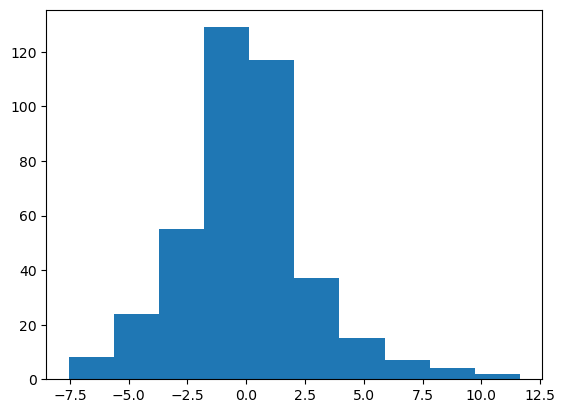

In [78]:
# Fit a linear regression model (y, X)
model4 = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Acceleration_Normalized + (Cylinders_Normalized * Displacement_Normalized) + (Cylinders_Normalized * Horsepower_Normalized) + (Cylinders_Normalized * Weight_Normalized) + (Cylinders_Normalized * Acceleration_Normalized) + (Cylinders_Normalized * Model_Year_Normalized) + (Cylinders_Normalized * Origin_Normalized) + (Displacement_Normalized * Horsepower_Normalized) + (Displacement_Normalized * Acceleration_Normalized) + (Displacement_Normalized * Origin_Normalized) + (Horsepower_Normalized * Weight_Normalized) + (Horsepower_Normalized * Acceleration_Normalized) + (Horsepower_Normalized * Model_Year_Normalized) + (Horsepower_Normalized * Origin_Normalized) + (Weight_Normalized * Acceleration_Normalized) + (Weight_Normalized * Model_Year_Normalized) + (Weight_Normalized * Origin_Normalized)', data=data)

model4 = model4.fit()

# View model summary
print(model3.summary())

# Predict values
mpg_pred_model4 = model4.predict()

# Add this prediction to the DataFrame
data['MPG_Predicted_Model4'] = mpg_pred_model4
# Add the DIFFERENCE between MPG data and prediction to the DataFrame
data['MPG_Residual_Model4'] = data['mpg'] - mpg_pred_model4
print(data.head())

plt.hist(data['MPG_Residual_Model4'])

# Get standard deviation of residuals
print('Standard deviation of residuals = ',np.std(data['MPG_Residual_Model4']))
